# Version 3 - Prompter Module

## Ver 3.1 - Add initial prompter module (generate questions based on goal and code)
- Added `prompter.py` 
- Added a prompter dataclass (just for formatting)
- Added prompter to the `Manager` class

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, structured questions to prompt the user to gain insights from data visualizations. 
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

``[
    { "index": 0,  "question": "What is the distribution of X"} ..
    ]
``
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}. The code of the visualization is: {code}.
"""
```

## Ver 3.2 - Remove code from prompt and generate questions with rationale
- Removed code from prompts to see if having goal context is enough (answer: ?)
- Generated rationale

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, structured questions to prompt the user to gain insights from a data visualization given their goal. 
The QUESTIONS YOU ASK MUST INCITE INSIGHTFUL IDEAS AND BE MEANINGFUL (e.g., related to the goal). Each prompting question must include a question and a rationale (JUSTIFICATION FOR WHAT we will learn from the answering the question).
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "question": "What is the distribution of X", "rationale": "This tells about "} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}.
"""
```

## Ver 3.3 - Add initial insight module
- Added an insight module to generate insights given the user's goal, questions about the visualization, and answers to the questions
- Observations: generated insights are not as insightful as I would like LOL

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, and creative insights and connections based on the answers the user gave to specific questions about a visualization given their goal. 
The INSIGHTS YOU GENERATE MUST BE INSIGHTFUL AND BE MEANINGFUL (e.g., related to the goal). 
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt = f"""
The visualization is: {goal.visualization}. The question the visualization wants to answer is: {goal.question}. The rationale for choosing the visualization is: {goal.rationale}.
\nHere are the questions about the visualization and the corresponding answers:
"""
```

## Ver 3.4 - Modify prompt to make insights better

- prompt modification

``` python
SYSTEM_PROMPT = """
You are a helpful and highly skilled data analyst who is trained to provide helpful, and creative insights and connections based on the answers the user gave to specific questions about a visualization given their goal. 
You should give possible and deeper explanations for the insights you generated. 
"""
```

## Ver 3.5 - Experimenting with the prompt to generate as much insigtful insights

``` python
SYSTEM_PROMPT = """

"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt += f"""
\nThese are the egoals of the user and the visualization they used:
\nQuestion: {goal.question}
\nVisualization: {goal.visualization}
\nRationale: {goal.rationale}
\nCan you generate insights from the user's answers that draws connections between them?
"""
```

## Ver 3.6 - Making a stronger prompt to generate stronger insights

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and create hypothesis for why the data appears to be that certain way.
"""
```

```` python
FORMAT_INSTRUCTIONS = """
THE OUTPUT MUST BE A CODE SNIPPET OF A VALID LIST OF JSON OBJECTS. IT MUST USE THE FOLLOWING FORMAT:

```[
    { "index": 0,  "insight": "The x could indicate ..."} ..
    ]
```
THE OUTPUT SHOULD ONLY USE THE JSON FORMAT ABOVE.
"""
````

``` python
user_prompt += f"""
\nThis is the goal of the user:
\nQuestion: {goal.question}
\nVisualization: {goal.visualization}
\nRationale: {goal.rationale}
\nCan you generate insights from the user's answers that draws connections between them?
"""
```

## Ver 3.7 - Update prompt to include suggestions that the user can explore (DISCONTINUED)

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and CREATE A HYPOTHESIS for why the data appears to be that certain way and GIVE SUGGESTIONS on what the user can examine next.
"""
```

## Ver 3.8 - Update prompt to generate suggestions separately from the insight (DISCONTINUED)
- decided to not add next steps anymore since it derails the insight generation process and makes it more confused, plus it ends up making the goal explorer for the insight a bit redundant

``` python
SYSTEM_PROMPT = """
You are a an experienced data analyst who can generate a given number of meaningful AND creative insights that people may miss at a first glance about a chart, given the goal of the data visualization and a series of questions answered by a user. 
\nBased on these questions, I want you to generate insights that make connections between the answers that the user gave. I want you to go beyond just describing the data and try to make connections and CREATE A HYPOTHESIS for why the data appears to be that certain way. 
\nAside fron an insight, I want you to generate next steps that can GIVE SUGGESTIONS on what the user can examine related to the insight.
"""
```

## Ver 3.9 - Reverted to the old version

## Ver 3.10 - Updated `goal.py` to generate insight goals 
- added `generate_insight_goals()`

``` python
SYSTEM_INSTRUCTIONS_INSIGHT = """
You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the dataset summary below.
"""
```
- This part below is the important part in the prompt. It basically is meant to make the goal insights focused on the insights.
```` python
user_prompt += f"""
The generated goals SHOULD allow the user to EXPLORE THEIR INSIGHTS DEEPER and allow them to make CONNECTIONS to other information from their dataset. THESE MUST ALL BE IN THE RATIONALE: Be creative and ALWAYS explicity explain why exploring this goal and answering its question is useful relative to the user's insights, what the visualization can do RELATIVE to the insight, and HOW exactly the visualization can help the user explore their insight deeper. Form your own hypothesis and connections. Cite specific parts of the user's rationale or information related to your answers when writing the rational and generating the goal. 
"""

user_prompt += f"""
These are qualities of a good goal.

Question
- The question explores a specific part of the user's insight. It is not general and instead tries to find reasons that cause the insight (e.g. "How does the average x of y (specific from insight) compare to others when controlling z?"). 
- The question is multi-faceted and explores how multiple variables lead to that insight. (e.g. "How does x (from insight) with type y compare to others when controlling the variable z?", "Is there a relationship between x and y, and how does it affect z?")
- It is not a general question (e.g. NOT "How does the avarege x vary with different types?").

Rationale
- The rationale is able to explain why it is crucial. (e.g. "This is crucial because x impacts y.")
- The rationale is able to provide a hypothesis (e.g. "Using this visualization will show if x is typically y compared to others")
- The rationale always ties back into a part of the insight (e.g. "The visualization will help us see if your insight is true or valid", "This will reveal how x affects your insight y.")
"""
````

## Setup

In [2]:
%pip uninstall -y lida 
%pip install -U python-dotenv
%pip install -U llmx
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install seaborn
# !pip install lida[infographics] # for infographics support

Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip show lida

Note: you may need to restart the kernel to use updated packages.


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import os
import pprint
import pickle

In [6]:
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
sys.path.append(os.path.abspath('../..'))

In [8]:
from lida.components.manager import Manager
from llmx import TextGenerationConfig, llm

In [9]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv("APIKEY")))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)

## Summarize Data

In [12]:
summary = lida.summarize("../cars.csv", summary_method="default", textgen_config=textgen_config)  
pprint.pprint(summary)

{'dataset_description': '',
 'field_names': ['Name',
                 'Type',
                 'AWD',
                 'RWD',
                 'Retail_Price',
                 'Dealer_Cost',
                 'Engine_Size__l_',
                 'Cyl',
                 'Horsepower_HP_',
                 'City_Miles_Per_Gallon',
                 'Highway_Miles_Per_Gallon',
                 'Weight',
                 'Wheel_Base',
                 'Len',
                 'Width'],
 'fields': [{'column': 'Name',
             'properties': {'description': '',
                            'dtype': 'string',
                            'num_unique_values': 385,
                            'samples': ['Nissan Altima S 4dr',
                                        'Mercury Marauder 4dr',
                                        'Toyota Prius 4dr (gas/electric)'],
                            'semantic_type': ''}},
            {'column': 'Type',
             'properties': {'description': '',
       

## Generate Goals

### Generate Goals without a Persona

In [20]:
goals = lida.goals(summary, n=20, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of car types in the dataset?

**Visualization:** `bar chart of Type`

**Rationale:** This visualization will show the frequency of each car type (Sedan, SUV, Sports Car, Wagon, Minivan) in the dataset. Understanding the distribution of car types helps identify market trends and consumer preferences, which is crucial for strategic decision-making.



### Goal 1
---
**Question:** How do retail prices vary across different car types?

**Visualization:** `box plot of Retail_Price by Type`

**Rationale:** A box plot will illustrate the spread and central tendency of retail prices for each car type. This allows for an analysis of price ranges and potential outliers, providing insights into the pricing strategy and market positioning for different types of vehicles.



### Goal 2
---
**Question:** What is the relationship between car types and their fuel efficiency (City_Miles_Per_Gallon)?

**Visualization:** `bar chart of average City_Miles_Per_Gallon by Type`

**Rationale:** This visualization will compare the average city miles per gallon for each car type. Understanding fuel efficiency by type can inform consumers about the most economical choices and help manufacturers focus on improving efficiency in specific categories.



### Goal 3
---
**Question:** What is the average horsepower across different car types?

**Visualization:** `bar chart of average Horsepower_HP_ by Type`

**Rationale:** A bar chart will display the average horsepower for each car type, allowing for comparison of performance characteristics. This insight can guide consumers in their purchase decisions based on performance expectations associated with different types of vehicles.



### Goal 4
---
**Question:** How does the weight of vehicles differ by type?

**Visualization:** `box plot of Weight by Type`

**Rationale:** Using a box plot to visualize weight differences among car types will reveal variations in vehicle size and construction. This information is valuable for understanding safety, fuel efficiency, and performance implications related to vehicle weight.



### Goal 5
---
**Question:** What is the relationship between Retail Price and Engine Size?

**Visualization:** `scatter plot of Retail_Price vs Engine_Size__l_`

**Rationale:** This visualization will help us understand how engine size influences the retail price of cars. A scatter plot is appropriate here as it allows us to identify trends and correlations between two continuous numeric variables.



### Goal 6
---
**Question:** How do horsepower levels vary across different car types?

**Visualization:** `box plot of Horsepower_HP_ by Type`

**Rationale:** A box plot will provide insights into the distribution of horsepower within each car type, highlighting medians, quartiles, and potential outliers. This is useful for understanding performance characteristics across different categories.



### Goal 7
---
**Question:** What is the average weight of cars based on their drivetrain configuration (AWD/RWD)?

**Visualization:** `bar chart of average Weight by AWD and RWD`

**Rationale:** Using a bar chart allows for easy comparison of average weights between all-wheel drive and rear-wheel drive vehicles. This can reveal insights into how drivetrain configurations relate to vehicle weight.



### Goal 8
---
**Question:** What is the distribution of City Miles Per Gallon across different engine sizes?

**Visualization:** `violin plot of City_Miles_Per_Gallon by Engine_Size__l_`

**Rationale:** A violin plot will show the distribution of city mileage across different engine sizes, allowing for a detailed view of the density and variation in fuel efficiency among various engine capacities.



### Goal 9
---
**Question:** How does the dealer cost compare to retail price across different cylinder counts?

**Visualization:** `grouped bar chart of average Dealer_Cost and Retail_Price by Cyl`

**Rationale:** A grouped bar chart will facilitate a direct comparison of average dealer costs and retail prices for different cylinder counts, revealing how engine size may affect pricing strategies in the market.



### Goal 10
---
**Question:** How does the Retail Price vary by Type and Engine Size?

**Visualization:** `box plot of Retail_Price by Type and Engine_Size__l_`

**Rationale:** This visualization allows us to see the distribution of retail prices across different car types while considering engine size, which may impact pricing. A box plot is chosen here to effectively show the median, quartiles, and potential outliers in the data.



### Goal 11
---
**Question:** What is the relationship between Horsepower, Weight, and Retail Price?

**Visualization:** `scatter plot of Horsepower_HP_ vs. Weight colored by Retail_Price`

**Rationale:** A scatter plot will help visualize the correlation between horsepower and weight while using color to represent retail price. This can reveal insights about how these variables interact and influence car pricing.



### Goal 12
---
**Question:** How do City and Highway Miles Per Gallon compare across different Types of Cars?

**Visualization:** `grouped bar chart of average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon by Type`

**Rationale:** This grouped bar chart will effectively compare the average city and highway MPG for each car type, helping to understand fuel efficiency differences across categories. Bar charts are chosen for their clarity in comparing quantities.



### Goal 13
---
**Question:** What is the impact of Cylinders and Engine Size on Retail Price?

**Visualization:** `heatmap of average Retail_Price by Cyl and Engine_Size__l_`

**Rationale:** A heatmap will visualize the relationship between the number of cylinders, engine size, and average retail price, allowing us to identify trends and patterns. This method is effective for displaying the intensity of values across two categorical axes.



### Goal 14
---
**Question:** Is there a correlation between Weight, Wheel Base, and Engine Size?

**Visualization:** `3D scatter plot of Weight, Wheel_Base, and Engine_Size__l_`

**Rationale:** A 3D scatter plot will allow us to visualize the relationship between weight, wheelbase, and engine size simultaneously. This is useful to explore how these continuous variables interact, and a 3D plot is appropriate for showing multi-dimensional data.



### Goal 15
---
**Question:** How does Engine Size affect Retail Price?

**Visualization:** `scatter plot of Engine_Size__l_ vs Retail_Price`

**Rationale:** This visualization will show the correlation between engine size and retail price, helping to identify if larger engines are associated with higher prices. A scatter plot is chosen as it effectively illustrates the relationship between two continuous variables.



### Goal 16
---
**Question:** What is the relationship between Horsepower and City Miles Per Gallon?

**Visualization:** `scatter plot of Horsepower_HP_ vs City_Miles_Per_Gallon`

**Rationale:** This visualization will help us understand if more powerful cars consume more fuel in the city. A scatter plot is suitable here as it allows us to visualize the potential correlation between horsepower and fuel efficiency in urban settings.



### Goal 17
---
**Question:** How does Weight correlate with Highway Miles Per Gallon?

**Visualization:** `scatter plot of Weight vs Highway_Miles_Per_Gallon`

**Rationale:** This visualization will provide insights into whether heavier cars tend to have lower highway fuel efficiency. A scatter plot is chosen to effectively display the relationship between these two continuous variables.



### Goal 18
---
**Question:** What is the impact of the number of Cylinders on Retail Price?

**Visualization:** `box plot of Cyl vs Retail_Price`

**Rationale:** This visualization will show the distribution of retail prices across different cylinder counts, helping to understand how engine configuration impacts pricing. A box plot is appropriate as it summarizes the distribution and highlights outliers.



### Goal 19
---
**Question:** How does the Type of vehicle relate to Engine Size?

**Visualization:** `box plot of Type vs Engine_Size__l_`

**Rationale:** This visualization will reveal how different vehicle types (e.g., Sedan, SUV) compare in terms of engine size. A box plot is chosen to effectively illustrate the distribution of engine sizes across the categorical variable of vehicle type.


### Saving and Loading Goals without a Persona

In [21]:
# # SAVE

# with open('goals2-5-8-20-combined-cars.pkl', 'wb') as f:
#     pickle.dump(goals, f)

In [22]:
# LOAD

with open('../ver2/goals2-5-6-20-combined-cars.pkl', 'rb') as f:
    goals = pickle.load(f)

display(goals)

[Goal(question='What is the distribution of car types in the dataset?', visualization='bar chart of Type', rationale="This visualization uses the 'Type' column to show the frequency of each car type (e.g., Sedan, SUV, Sports Car, Wagon, Minivan). A bar chart is appropriate here as it allows for easy comparison of the number of cars in each category, helping to identify which types are most prevalent and potentially influencing market trends.", index=0),
 Goal(question='How do retail prices vary by car type?', visualization='box plot of Retail_Price by Type', rationale="Using the 'Retail_Price' column grouped by 'Type' allows us to visualize the distribution of prices for each car type. A box plot is effective here as it shows the median, quartiles, and potential outliers, giving insights into price ranges and how they differ among various car types.", index=1),
 Goal(question='What is the average engine size for each car type?', visualization='bar chart of average Engine_Size__l_ by Ty

In [23]:
for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of car types in the dataset?

**Visualization:** `bar chart of Type`

**Rationale:** This visualization uses the 'Type' column to show the frequency of each car type (e.g., Sedan, SUV, Sports Car, Wagon, Minivan). A bar chart is appropriate here as it allows for easy comparison of the number of cars in each category, helping to identify which types are most prevalent and potentially influencing market trends.



### Goal 1
---
**Question:** How do retail prices vary by car type?

**Visualization:** `box plot of Retail_Price by Type`

**Rationale:** Using the 'Retail_Price' column grouped by 'Type' allows us to visualize the distribution of prices for each car type. A box plot is effective here as it shows the median, quartiles, and potential outliers, giving insights into price ranges and how they differ among various car types.



### Goal 2
---
**Question:** What is the average engine size for each car type?

**Visualization:** `bar chart of average Engine_Size__l_ by Type`

**Rationale:** This visualization will use the 'Engine_Size__l_' column averaged by 'Type' to illustrate the differences in engine size across car types. A bar chart is suitable for this purpose, as it allows for straightforward comparison of average engine sizes, which can be indicative of performance characteristics associated with each type.



### Goal 3
---
**Question:** What is the relationship between car type and fuel efficiency (City and Highway MPG)?

**Visualization:** `grouped bar chart of average City_Miles_Per_Gallon and Highway_Miles_Per_Gallon by Type`

**Rationale:** This visualization will utilize 'City_Miles_Per_Gallon' and 'Highway_Miles_Per_Gallon' to compare average fuel efficiency across different car types. A grouped bar chart allows for a clear comparison between city and highway MPG for each type, aiding in understanding how vehicle design impacts fuel efficiency.



### Goal 4
---
**Question:** What is the impact of car type on weight?

**Visualization:** `box plot of Weight by Type`

**Rationale:** Using the 'Weight' column categorized by 'Type' helps visualize how the weight of cars differs among types. A box plot is appropriate as it provides a detailed view of the weight distribution, including median and outliers, which can inform decisions related to safety, performance, and efficiency based on vehicle weight.



### Goal 5
---
**Question:** How does the horsepower relate to the retail price of cars?

**Visualization:** `scatter plot of Horsepower_HP_ vs Retail_Price`

**Rationale:** This visualization will help us understand the correlation between horsepower and retail price, allowing us to identify if more powerful cars tend to have higher prices.



### Goal 6
---
**Question:** What is the relationship between engine size and fuel efficiency in terms of City and Highway MPG?

**Visualization:** `line chart comparing Engine_Size__l_ with City_Miles_Per_Gallon and Highway_Miles_Per_Gallon`

**Rationale:** Using a line chart will allow us to visualize the trends in fuel efficiency as engine size increases, helping to identify if larger engines correlate with lower MPG.



### Goal 7
---
**Question:** How does weight affect the horsepower of different car types?

**Visualization:** `box plot of Weight vs Horsepower_HP_ grouped by Type`

**Rationale:** A box plot will enable us to compare the distribution of horsepower across different weight categories for each car type, highlighting potential trends and outliers.



### Goal 8
---
**Question:** What is the impact of the number of cylinders on the retail price and dealer cost?

**Visualization:** `bar chart comparing average Retail_Price and Dealer_Cost by Cyl`

**Rationale:** A bar chart will effectively show the average retail price and dealer cost across different cylinder counts, helping to identify if more cylinders lead to higher costs.



### Goal 9
---
**Question:** How does the length of the car relate to its weight and wheelbase?

**Visualization:** `3D scatter plot of Len, Weight, and Wheel_Base`

**Rationale:** A 3D scatter plot will allow us to visualize the relationships between car length, weight, and wheelbase, providing insights into how these dimensions interact with each other.



### Goal 10
---
**Question:** How does the retail price vary with engine size and horsepower across different car types?

**Visualization:** `3D scatter plot of Retail_Price vs Engine_Size__l_ vs Horsepower_HP_ colored by Type`

**Rationale:** This visualization allows us to explore the relationship between retail price, engine size, and horsepower, while also differentiating between car types. It will help identify if larger engines and higher horsepower correlate with higher retail prices across various types of cars.



### Goal 11
---
**Question:** What is the relationship between weight, engine size, and retail price for different car types?

**Visualization:** `Bubble chart of Retail_Price on the y-axis, Weight on the x-axis, and Engine_Size__l_ represented by bubble size, colored by Type`

**Rationale:** This bubble chart will illustrate how weight and engine size affect retail price, while also showing the distribution of different car types. It provides insights into whether heavier cars with larger engines tend to be priced higher, and how this varies by car type.



### Goal 12
---
**Question:** How do city miles per gallon compare with highway miles per gallon based on engine size and number of cylinders?

**Visualization:** `Grouped bar chart of City_Miles_Per_Gallon and Highway_Miles_Per_Gallon grouped by Engine_Size__l_ and colored by Cyl`

**Rationale:** This grouped bar chart allows for a direct comparison of city and highway miles per gallon across different engine sizes and cylinder counts. It will help us understand how engine specifications influence fuel efficiency in urban versus highway driving conditions.



### Goal 13
---
**Question:** What is the impact of wheelbase on the weight and retail price across different car types?

**Visualization:** `Line chart of Weight and Retail_Price against Wheel_Base, with separate lines for each Type`

**Rationale:** This line chart will help visualize the trends in weight and retail price as wheelbase increases, segmented by car type. It will provide insights into how wheelbase affects both the mass and market value of different vehicle categories.



### Goal 14
---
**Question:** How does the distribution of horsepower vary with the number of cylinders and car type?

**Visualization:** `Box plot of Horsepower_HP_ grouped by Cyl and colored by Type`

**Rationale:** This box plot will show the distribution of horsepower across different cylinder counts for each car type. It will allow us to identify patterns and outliers in horsepower based on engine configuration, providing insights into performance characteristics associated with different types of vehicles.



### Goal 15
---
**Question:** How does the retail price relate to the engine size across different car types?

**Visualization:** `scatter plot of Retail_Price vs Engine_Size__l_ colored by Type`

**Rationale:** This visualization will help us understand if there's a correlation between engine size and retail price, while also allowing us to see if this relationship differs by car type. By plotting Retail_Price against Engine_Size__l_ and using Type to differentiate the points, we can gain insights into how engine size impacts pricing across various categories of cars.



### Goal 16
---
**Question:** What is the relationship between horsepower and weight for different car types?

**Visualization:** `scatter plot of Horsepower_HP_ vs Weight colored by Type`

**Rationale:** This visualization will illustrate the relationship between horsepower and weight, which is crucial for understanding performance characteristics. By differentiating the points by Type, we can see if certain types of cars (e.g., Sports Cars vs. SUVs) have different dynamics in terms of horsepower relative to their weight.



### Goal 17
---
**Question:** How do city miles per gallon compare with highway miles per gallon across different engine sizes?

**Visualization:** `box plot comparing City_Miles_Per_Gallon and Highway_Miles_Per_Gallon grouped by Engine_Size__l_`

**Rationale:** This visualization will reveal how fuel efficiency varies between city and highway driving conditions for various engine sizes. By using a box plot, we can effectively summarize the distribution of MPG values for both city and highway, allowing us to identify trends and outliers in fuel efficiency based on engine size.



### Goal 18
---
**Question:** What is the impact of the number of cylinders on retail price and dealer cost?

**Visualization:** `dual-axis bar chart comparing average Retail_Price and average Dealer_Cost by Cyl`

**Rationale:** This dual-axis bar chart will allow us to compare the average retail price and dealer cost across different cylinder counts. By using this format, we can visualize how the number of cylinders influences both retail pricing and dealer costs, which is essential for understanding market dynamics.



### Goal 19
---
**Question:** How does the weight of the car correlate with its length and width?

**Visualization:** `3D scatter plot of Weight vs Len and Width`

**Rationale:** This 3D scatter plot will help us visualize the relationship between car weight, length, and width. Understanding how these dimensions correlate can provide insights into design trends and structural characteristics of different car types, which is important for a comprehensive analysis of automotive data.


### Generating Goals with a Persona

In [14]:
# goals can also be based on a persona 
persona = "a mechanic who wants to buy a car that is cheap but has good gas mileage"
personal_goals = lida.goals(summary, n=20, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of Retail Price?

**Visualization:** `histogram of Retail_Price`

**Rationale:** This tells us about the range of car prices available, helping the mechanic identify affordable options.



### Goal 1
---
**Question:** How does City Miles Per Gallon vary with Retail Price?

**Visualization:** `scatter plot of City_Miles_Per_Gallon vs Retail_Price`

**Rationale:** This helps assess whether higher-priced cars offer better fuel efficiency.



### Goal 2
---
**Question:** What is the correlation between Highway Miles Per Gallon and City Miles Per Gallon?

**Visualization:** `scatter plot of Highway_Miles_Per_Gallon vs City_Miles_Per_Gallon`

**Rationale:** Understanding this relationship can help the mechanic predict fuel efficiency based on city driving conditions.



### Goal 3
---
**Question:** Which car types have the best average City Miles Per Gallon?

**Visualization:** `bar chart of average City_Miles_Per_Gallon by Type`

**Rationale:** This allows the mechanic to quickly identify which types of cars are more fuel-efficient.



### Goal 4
---
**Question:** What is the distribution of Engine Sizes across different car types?

**Visualization:** `box plot of Engine_Size__l_ by Type`

**Rationale:** This shows how engine size varies across types, which can impact fuel efficiency.



### Goal 5
---
**Question:** How does the number of Cylinders affect City Miles Per Gallon?

**Visualization:** `box plot of City_Miles_Per_Gallon by Cyl`

**Rationale:** This helps the mechanic understand how engine configuration influences fuel efficiency.



### Goal 6
---
**Question:** What is the relationship between Horsepower and City Miles Per Gallon?

**Visualization:** `scatter plot of Horsepower_HP_ vs City_Miles_Per_Gallon`

**Rationale:** This can indicate if more powerful cars compromise fuel efficiency.



### Goal 7
---
**Question:** How do the weights of cars affect their fuel efficiency?

**Visualization:** `scatter plot of Weight vs City_Miles_Per_Gallon`

**Rationale:** This helps the mechanic see if lighter cars generally provide better fuel economy.



### Goal 8
---
**Question:** What is the average Retail Price for cars with good gas mileage (above 25 MPG)?

**Visualization:** `bar chart of average Retail_Price for City_Miles_Per_Gallon > 25`

**Rationale:** This gives insight into the cost of more fuel-efficient cars.



### Goal 9
---
**Question:** What is the average Dealer Cost for cars with high Highway Miles Per Gallon?

**Visualization:** `bar chart of average Dealer_Cost for Highway_Miles_Per_Gallon > 30`

**Rationale:** This can help the mechanic identify cost-effective options for high-mileage vehicles.



### Goal 10
---
**Question:** How does the length of a car relate to its fuel efficiency?

**Visualization:** `scatter plot of Len vs City_Miles_Per_Gallon`

**Rationale:** Understanding this relationship can help assess if larger cars are less efficient.



### Goal 11
---
**Question:** What is the distribution of AWD and RWD cars in terms of fuel efficiency?

**Visualization:** `box plot of City_Miles_Per_Gallon by AWD and RWD`

**Rationale:** This helps the mechanic understand how drivetrain configurations impact gas mileage.



### Goal 12
---
**Question:** What is the average weight of cars grouped by their Type?

**Visualization:** `bar chart of average Weight by Type`

**Rationale:** This can provide insights into how the type of car affects its overall weight and potentially its fuel efficiency.



### Goal 13
---
**Question:** How does the wheelbase length correlate with fuel efficiency?

**Visualization:** `scatter plot of Wheel_Base vs City_Miles_Per_Gallon`

**Rationale:** This can help the mechanic understand if longer wheelbases lead to worse fuel economy.



### Goal 14
---
**Question:** What is the average Highway Miles Per Gallon for cars with different engine sizes?

**Visualization:** `bar chart of average Highway_Miles_Per_Gallon by Engine_Size__l_`

**Rationale:** This can help identify if larger engines compromise highway fuel efficiency.



### Goal 15
---
**Question:** What is the relationship between the number of cylinders and Highway Miles Per Gallon?

**Visualization:** `box plot of Highway_Miles_Per_Gallon by Cyl`

**Rationale:** This shows how engine configuration impacts highway fuel efficiency.



### Goal 16
---
**Question:** What percentage of cars have good fuel efficiency (above 25 MPG)?

**Visualization:** `pie chart of percentage of cars with City_Miles_Per_Gallon > 25`

**Rationale:** This gives a quick overview of the availability of fuel-efficient options.



### Goal 17
---
**Question:** What is the average Retail Price for cars categorized as SUVs versus Sedans?

**Visualization:** `bar chart of average Retail_Price by Type`

**Rationale:** This helps the mechanic compare the cost of different car types.



### Goal 18
---
**Question:** How does the average horsepower vary among different types of cars?

**Visualization:** `bar chart of average Horsepower_HP_ by Type`

**Rationale:** This may indicate if more powerful cars are generally more expensive or less fuel-efficient.



### Goal 19
---
**Question:** What is the relationship between car width and fuel efficiency?

**Visualization:** `scatter plot of Width vs City_Miles_Per_Gallon`

**Rationale:** This can help determine if wider cars tend to have lower fuel efficiency.


### Saving and Loading Goals with a Persona

In [16]:
# # SAVE

# with open('goals-persona.pkl', 'wb') as f:
#     pickle.dump(personal_goals, f)

NameError: name 'personal_goals' is not defined

In [ ]:
# LOAD

with open('goals-persona.pkl', 'rb') as f:
    loaded = pickle.load(f)

display(loaded)

[Goal(question='What is the distribution of Retail Price?', visualization='histogram of Retail_Price', rationale='This tells us about the range of car prices available, helping the mechanic identify affordable options.', index=0),
 Goal(question='How does City Miles Per Gallon vary with Retail Price?', visualization='scatter plot of City_Miles_Per_Gallon vs Retail_Price', rationale='This helps assess whether higher-priced cars offer better fuel efficiency.', index=1),
 Goal(question='What is the correlation between Highway Miles Per Gallon and City Miles Per Gallon?', visualization='scatter plot of Highway_Miles_Per_Gallon vs City_Miles_Per_Gallon', rationale='Understanding this relationship can help the mechanic predict fuel efficiency based on city driving conditions.', index=2),
 Goal(question='Which car types have the best average City Miles Per Gallon?', visualization='bar chart of average City_Miles_Per_Gallon by Type', rationale='This allows the mechanic to quickly identify whic

## Generate Visualizations

In [30]:
i=18

In [45]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)  
charts[0]

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAACQzElEQVR4nOzdd3gU1f7H8fduek8gEAgtQBAIVUGQIkgRECxYEbmCXhD1ggrYK1iu2CiKBbuocAUbdgQBBYEf0qSDIL2EIiQxkL7n98ewu9lkExIIBLOf1/Psk8yZszPnzMzOfvfMnDM2Y4xBRERERHyGvbwLICIiIiJnlwJAERERER+jAFBERETExygAFBEREfExCgBFREREfIwCQBEREREfowBQRERExMcoABQRERHxMQoARURERHyMAkARERERH6MAUERERMTHKAAUERER8TEKAEVERER8jAJAERERER+jAFBERETExygAFBEREfEx/+gA0GazMXz48HJb/5gxY7DZbGdlHYcPHz6j6/nggw+w2Wzs2LHjjK7nnyw3N5cHHniAWrVqYbfb6du3b6mX4dzOy5cvL/sCnuN27NiBzWbjpZdeKu+ilEh6ejpDhgyhWrVq2Gw2RowYcVbWm5CQwC233OKa/vnnn7HZbPz8889lto4zsUwpGW/b/pZbbiEhIeGsrL+in+tPd1sW/PydCWdjHSVRLgHgjBkzsNlsfPnll4XmtWjRApvNxvz58wvNq127Nu3btz9j5dqwYQNjxowplw/Gs88+y8yZM8/6eiui119/nQ8++KDMl/vee+/x4osvct111zFlyhRGjhx51ssgZ8+zzz7LBx98wJ133slHH33EzTffXN5FknOAztVSUZRLANixY0cAfv31V4/0tLQ01q1bh7+/P4sWLfKYt3v3bnbv3u1675mwYcMGnnzyy

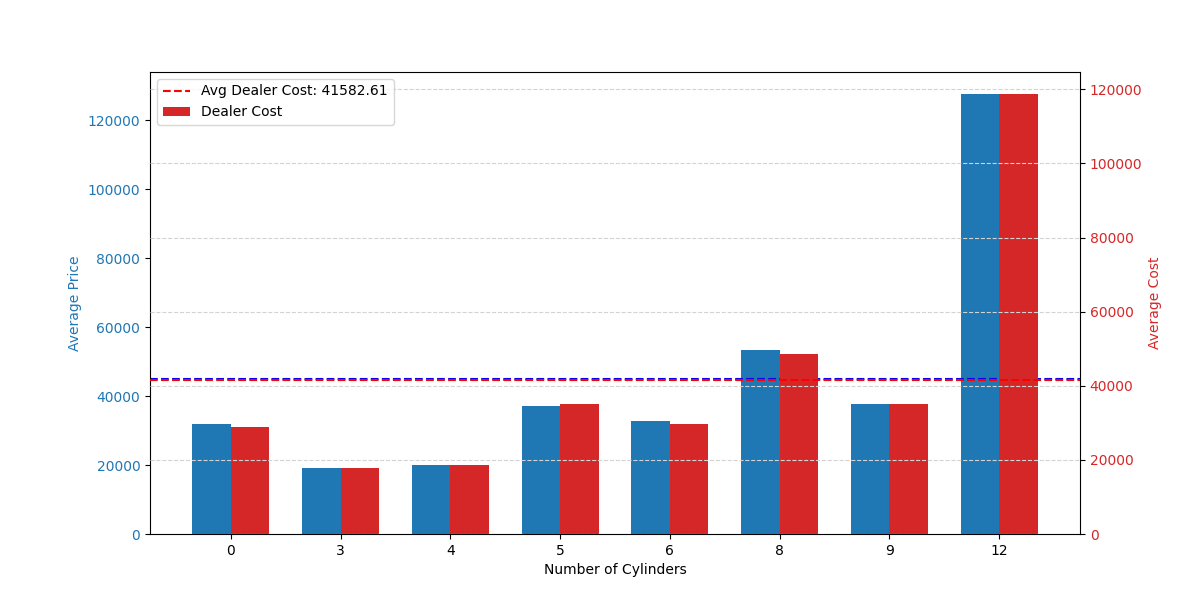

In [31]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["can you separate the bars for average cost and average price and put them side by side instead of stacking them?"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

### Save Code

In [38]:
# SAVE

with open('./scatter/cars5-v2-5-6/code-v2-5-6.pkl', 'wb') as f:
    pickle.dump(charts[0], f)

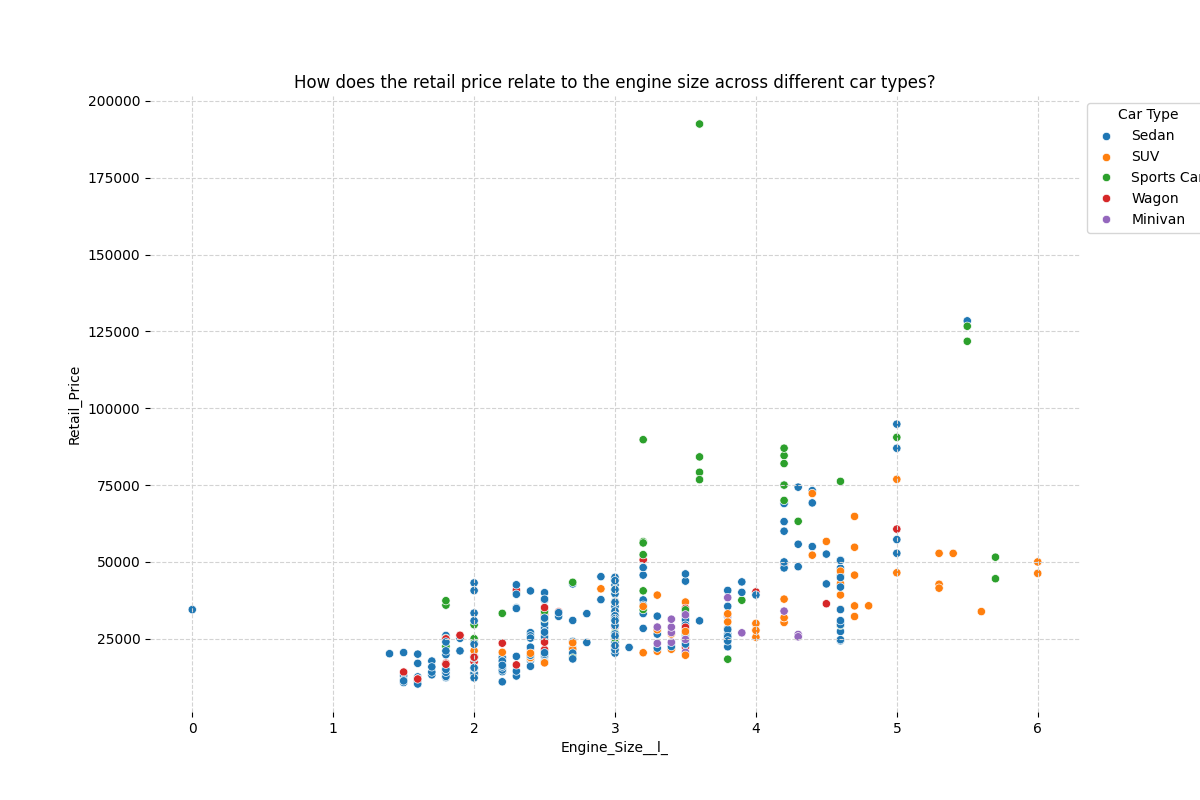

In [121]:
# LOAD

with open('./scatter/cars15-v2-5-6/code-v2-5-6.pkl', 'rb') as f:
    code = pickle.load(f)

display(code)

## Generate Prompts

### Generate Prompts

In [47]:
prompts = lida.prompt(goals[i], textgen_config=textgen_config, n=10)  

for prompt in prompts:
    display(prompt)


### Prompt 0
---
**Question:** What is the average retail price for cars with larger engine sizes compared to smaller engine sizes?

**Rationale:** This will help us understand if there is a trend of higher retail prices for cars with larger engine sizes, indicating a potential correlation between engine size and pricing.




### Prompt 1
---
**Question:** Are there any outliers in terms of retail price for a specific car type with a certain engine size?

**Rationale:** Identifying outliers can provide insights into unique cases where the retail price deviates significantly from the general trend, potentially indicating special features or circumstances affecting pricing.




### Prompt 2
---
**Question:** Which car type shows the strongest positive correlation between engine size and retail price?

**Rationale:** Identifying the car type with the strongest positive correlation can help us understand which type of cars tend to have higher retail prices as engine size increases, providing insights into market preferences or trends.




### Prompt 3
---
**Question:** Is there a noticeable difference in the spread of retail prices for cars with similar engine sizes but different types?

**Rationale:** Understanding the spread of retail prices within similar engine sizes across different car types can reveal if certain types of cars are consistently priced higher or lower than others, indicating market segmentation or pricing strategies.




### Prompt 4
---
**Question:** Do luxury car types tend to have larger engine sizes compared to economy car types?

**Rationale:** Comparing the engine sizes of luxury car types to economy car types can provide insights into whether engine size is a distinguishing factor between different market segments, helping understand the relationship between car type, engine size, and pricing.




### Prompt 5
---
**Question:** How do electric cars compare to traditional fuel cars in terms of engine size and retail price?

**Rationale:** Comparing electric cars to traditional fuel cars in terms of engine size and retail price can reveal differences in pricing strategies or market positioning between these two types of vehicles, offering insights into the impact of technology on pricing.




### Prompt 6
---
**Question:** Are there any car types that consistently deviate from the general trend of higher retail prices for larger engine sizes?

**Rationale:** Identifying car types that deviate from the general trend can highlight unique characteristics or market dynamics specific to those types, offering insights into factors beyond engine size that influence pricing.




### Prompt 7
---
**Question:** How do sports cars compare to SUVs in terms of engine size and retail price?

**Rationale:** Comparing sports cars to SUVs can provide insights into how different vehicle categories are priced based on engine size, helping understand consumer preferences and market positioning within the automotive industry.




### Prompt 8
---
**Question:** Is there a pattern in the distribution of car types based on engine size and retail price clusters?

**Rationale:** Identifying patterns in the distribution of car types based on engine size and retail price clusters can reveal market segments or pricing tiers within the dataset, offering insights into how cars are priced based on their characteristics.




### Prompt 9
---
**Question:** Do certain car types exhibit a more linear relationship between engine size and retail price compared to others?

**Rationale:** Identifying car types with a more linear relationship can indicate a stronger correlation between engine size and pricing within those types, providing insights into pricing strategies or consumer preferences specific to each type.



### Saving  and loading prompts

In [24]:
# # SAVE

# with open('./barchart/cars18-v2-5-6/prompt3/prompt-v3-4-10.pkl', 'wb') as f:
#     pickle.dump(prompts, f)

In [25]:
# LOAD

with open('./barchart/cars18-v2-5-6/prompt3/prompt-v3-4-10.pkl', 'rb') as f:
    prompts = pickle.load(f)

display(prompts)

[Prompt(question='How does the average retail price change as the number of cylinders increases?', rationale='This helps us understand if higher cylinder counts correlate with higher retail prices, indicating consumer demand or perceived value.', index=0),
 Prompt(question='Are there any significant differences in dealer costs for vehicles with different cylinder counts?', rationale='Identifying these differences can reveal how dealer pricing strategies vary based on vehicle specifications.', index=1),
 Prompt(question='What trends can we observe in the relationship between retail price and dealer cost across cylinder counts?', rationale='Understanding this relationship can provide insights into pricing strategies and profit margins for different vehicle types.', index=2),
 Prompt(question='Do vehicles with a higher number of cylinders generally have a higher markup from dealer cost to retail price?', rationale='This can indicate how much value is added by the dealer for higher-cylinde

## Generating Insights

### Saving and Loading answers

In [26]:
# answers = [
#     "The average retail price for cars with larger engine sizes compared to smaller ones are usually higher in general, but the difference in the price depends on the type. For instance in certain car types like sedans and sports cars, it's easier to see a steeper rise compared to car types like minivans, wagons and SUVs.",
#     "The most expensive car (almost 200,000) is a sports car and it actually has an engine size of 3. There's also a sedan with an engine size of 0 that's around 30-40k and I don't really know how that's possible. Maybe not an outlier but sedans also offer a lot of price options for the same engine size.",
#     "There doesn't seem to be one with a really really strong positive correlation because the dots form a trend line, but with a pretty big width, so I'm not really sure what that entails.",
#     "Sedans usually have the most price options for different engine sizes. Sports cars are usually on the higher end of the price spectrum compared to other car types with the same engine size. Meanwhile, wagons and minivans tend to be on the lower end.",
#     "I don't really know what luxury car types are, but I dont think that there are equal plot points to be able to acurately tell if more of the sports cars have higher engine sizes then economy car types.",
#     "I don't know which ones are electric or traditional.",
#     "For SUVs, even if the engine size is big, the price different isn't as large as other SUVs with smaller engine sizes. It's still generally more expensive, but the change is less compared to car types like sports cars. Maybe it's also worth noting that minivans and wagons' engine sizes don't exceed 5.",
#     "Same answer as above. Sports cars are obviously more expensive on avarage.",
#     "Maybe it generaally goes up? but I dont think that it's the sole predictor.",
#     "Difficult to tell because none of them are perfectly linear but they all generally seems to have an upward trend in price as engine size increases."
# ]

# with open('answers.pkl', 'wb') as f:
#     pickle.dump(answers, f)

In [27]:
with open('./barchart/cars18-v2-5-6/prompt3/answers.pkl', 'rb') as f:
    answers = pickle.load(f)

display(answers)

['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders. All the other prices fall under or relatively close to 40,000 until the price of cars with 12 cylinders suddenly faces a drastic spike which is around 3x the others.',
 'The dealer costs are almost exactly the same as the average price.',
 'The dealer cost and average price are almost exactly the same.',
 'Yeah, generally. 12 has the highest price and cost, followed by 8, 9, then 5, then 6 and 0, then 4 and 3.',
 'At cylinder count of 12. The price and cost is 3x the average.',
 'The price and the cost are almost exactly the same. For cars with lover cylinder counts, they are below the average of 40,000.',
 'Between 4 and 6, the difference is around 5k. Between 6 and 8, the difference is around 10k.',
 'Cars with 12 cylinders have an extremely high cost and price of 120,000.',
 "I don't know the industry standards.",
 'I do not have information on thi

In [35]:
# LOAD

with open('./barchart/cars18-v2-5-6/prompt3/insight-v3-6-5.pkl', 'rb') as f:
    insight2 = pickle.load(f)

for insight_i in insight2:
    display(insight_i)

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

AttributeError: 'Insight' object has no attribute 'prompts'

### Generating Insights

In [ ]:
insights = lida.insights(goal=goals[i], answers=answers, prompts=prompts, n=10)

In [ ]:
for insight in insights:
    display(insight)


### Insight 0
---
**Insight:** The average retail price for cars with 0 cylinders being greater than those with 3 and 4 cylinders, and similar to cars with 6 cylinders, suggests that there may be unique features or branding associated with 0 and 6 cylinder cars that justify their higher prices.



### Insight 1
---
**Insight:** The sudden spike in average price for cars with 12 cylinders, being around 3 times higher than others, could indicate a niche market for high-performance or luxury vehicles with 12 cylinders, leading to significantly higher pricing.



### Insight 2
---
**Insight:** The close alignment between dealer costs and average prices across different cylinder counts suggests that dealers may be pricing their vehicles based on cost, with minimal markup or discount strategies in place.



### Insight 3
---
**Insight:** The consistent relationship between dealer cost and retail price across cylinder counts indicates a standardized pricing strategy in the market, where the markup from dealer cost to retail price remains relatively constant regardless of the number of cylinders.



### Insight 4
---
**Insight:** The higher average prices and costs for vehicles with more cylinders, especially at 12 cylinders, suggest that manufacturers and dealers capitalize on the perceived value and performance associated with higher cylinder counts to command premium pricing.



### Insight 5
---
**Insight:** The significant increase in retail price at 12 cylinders compared to lower counts implies a threshold where the market perceives a substantial jump in value or exclusivity, leading to a sharp increase in pricing for cars with 12 cylinders.



### Insight 6
---
**Insight:** The similarity between average dealer costs and retail prices for vehicles with fewer cylinders, staying below the average of $40,000, indicates a consistent pricing strategy where costs are directly reflected in retail prices without significant markups.



### Insight 7
---
**Insight:** The average price differences between vehicles with 4, 6, and 8 cylinders, with increments of around $5,000 between 4 and 6 cylinders and $10,000 between 6 and 8 cylinders, suggest a gradual pricing scale based on cylinder counts in the market.



### Insight 8
---
**Insight:** The outlier status of cars with 12 cylinders, having extremely high costs and prices of $120,000, highlights the presence of ultra-luxury or high-performance vehicles in the market that significantly deviate from the pricing norms of other cylinder counts.



### Insight 9
---
**Insight:** Without information on industry standards, the comparison of average retail prices and dealer costs for different cylinder counts may indicate how pricing strategies within the dataset align or diverge from broader industry practices, potentially influencing future production and marketing decisions.


### Saving and Loading insights

In [29]:
# #SAVE

# with open('./barchart/cars18-v2-5-6/prompt3/insight-v3-9-5.pkl', 'wb') as f:
#     pickle.dump(insights, f)

In [30]:
with open('./barchart/cars18-v2-5-6/prompt3/insight-v3-9-5.pkl', 'rb') as f:
    insights = pickle.load(f)

display(insights)

AttributeError: 'Insight' object has no attribute 'prompts'

In [31]:
i = 18

In [32]:
insights = lida.insights(goal=goals[i], answers=answers, prompts=prompts, n=10)

In [33]:
print(insights)

for insight in insights:
    display(insight)

[Insight(insight='The unexpected high average retail price for vehicles with 0 cylinders suggests that these may be specialty or luxury vehicles, which could skew the overall pricing trends. This could indicate a niche market that values unique features over traditional performance metrics.', prompts=['How does the average retail price change as the number of cylinders increases?', 'Are there any significant differences in dealer costs for vehicles with different cylinder counts?'], answers=['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders.', 'The dealer costs are almost exactly the same as the average price.'], index=0), Insight(insight='The consistent relationship between dealer cost and retail price across cylinder counts suggests that dealers maintain a standard markup strategy, regardless of the cylinder count. This could imply that the market is relatively stable and predictable for vehicles wit


### Insight 0
---
**Insight:** The unexpected high average retail price for vehicles with 0 cylinders suggests that these may be specialty or luxury vehicles, which could skew the overall pricing trends. This could indicate a niche market that values unique features over traditional performance metrics.

**Pairs:**

    **Prompts:** ['How does the average retail price change as the number of cylinders increases?', 'Are there any significant differences in dealer costs for vehicles with different cylinder counts?']
    **Answers:** ['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders.', 'The dealer costs are almost exactly the same as the average price.']



### Insight 1
---
**Insight:** The consistent relationship between dealer cost and retail price across cylinder counts suggests that dealers maintain a standard markup strategy, regardless of the cylinder count. This could imply that the market is relatively stable and predictable for vehicles with fewer cylinders.

**Pairs:**

    **Prompts:** ['What trends can we observe in the relationship between retail price and dealer cost across cylinder counts?', 'How does the average dealer cost compare to the average retail price for vehicles with fewer cylinders?']
    **Answers:** ['The dealer cost and average price are almost exactly the same.', 'The price and the cost are almost exactly the same. For cars with lower cylinder counts, they are below the average of 40,000.']



### Insight 2
---
**Insight:** The significant price spike at 12 cylinders indicates a luxury or performance segment that could be targeted for marketing strategies. This suggests that consumers are willing to pay a premium for higher cylinder counts, which could be leveraged in future vehicle production.

**Pairs:**

    **Prompts:** ['Do vehicles with a higher number of cylinders generally have a higher markup from dealer cost to retail price?', 'Is there a threshold number of cylinders where the retail price significantly increases?']
    **Answers:** ['Yeah, generally. 12 has the highest price and cost, followed by 8, 9, then 5, then 6 and 0, then 4 and 3.', 'At cylinder count of 12. The price and cost is 3x the average.']



### Insight 3
---
**Insight:** The average price differences between 4, 6, and 8 cylinders suggest a tiered pricing strategy that could reflect consumer preferences for performance and efficiency. This could indicate that consumers are willing to pay more for vehicles that offer a balance of power and fuel economy.

**Pairs:**

    **Prompts:** ['What is the average price difference between vehicles with 4, 6, and 8 cylinders?']
    **Answers:** ['Between 4 and 6, the difference is around 5k. Between 6 and 8, the difference is around 10k.']



### Insight 4
---
**Insight:** The lack of knowledge about industry standards may indicate a gap in market research that could be addressed. Understanding how these prices compare to industry benchmarks could provide insights into competitive positioning and pricing strategies.

**Pairs:**

    **Prompts:** ['What implications do the observed trends in retail price and dealer cost have for future vehicle production and marketing?', 'How do average retail prices and dealer costs for different cylinder counts compare to industry standards?']
    **Answers:** ['I do not have information on this.', "I don't know the industry standards."]


In [34]:
insight_prompts = [insight.prompts for insight in insights]
insight_answers = [insight.answers for insight in insights]

### Saving and Loading Insights

In [43]:
# SAVE

with open('./new-insights.pkl', 'wb') as f:
    pickle.dump(insights, f)

In [44]:
# LOAD

with open('./new-insights.pkl', 'rb') as f:
    insights = pickle.load(f)

for insight in insights:
    display(insight)


### Insight 0
---
**Insight:** The unexpected high average retail price for vehicles with 0 cylinders suggests that these may be specialty or luxury vehicles, which could skew the overall pricing trends. This could indicate a niche market that values unique features over traditional performance metrics.

**Pairs:**

    **Prompts:** ['How does the average retail price change as the number of cylinders increases?', 'Are there any significant differences in dealer costs for vehicles with different cylinder counts?']
    **Answers:** ['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders.', 'The dealer costs are almost exactly the same as the average price.']



### Insight 1
---
**Insight:** The consistent relationship between dealer cost and retail price across cylinder counts suggests that dealers maintain a standard markup strategy, regardless of the cylinder count. This could imply that the market is relatively stable and predictable for vehicles with fewer cylinders.

**Pairs:**

    **Prompts:** ['What trends can we observe in the relationship between retail price and dealer cost across cylinder counts?', 'How does the average dealer cost compare to the average retail price for vehicles with fewer cylinders?']
    **Answers:** ['The dealer cost and average price are almost exactly the same.', 'The price and the cost are almost exactly the same. For cars with lower cylinder counts, they are below the average of 40,000.']



### Insight 2
---
**Insight:** The significant price spike at 12 cylinders indicates a luxury or performance segment that could be targeted for marketing strategies. This suggests that consumers are willing to pay a premium for higher cylinder counts, which could be leveraged in future vehicle production.

**Pairs:**

    **Prompts:** ['Do vehicles with a higher number of cylinders generally have a higher markup from dealer cost to retail price?', 'Is there a threshold number of cylinders where the retail price significantly increases?']
    **Answers:** ['Yeah, generally. 12 has the highest price and cost, followed by 8, 9, then 5, then 6 and 0, then 4 and 3.', 'At cylinder count of 12. The price and cost is 3x the average.']



### Insight 3
---
**Insight:** The average price differences between 4, 6, and 8 cylinders suggest a tiered pricing strategy that could reflect consumer preferences for performance and efficiency. This could indicate that consumers are willing to pay more for vehicles that offer a balance of power and fuel economy.

**Pairs:**

    **Prompts:** ['What is the average price difference between vehicles with 4, 6, and 8 cylinders?']
    **Answers:** ['Between 4 and 6, the difference is around 5k. Between 6 and 8, the difference is around 10k.']



### Insight 4
---
**Insight:** The lack of knowledge about industry standards may indicate a gap in market research that could be addressed. Understanding how these prices compare to industry benchmarks could provide insights into competitive positioning and pricing strategies.

**Pairs:**

    **Prompts:** ['What implications do the observed trends in retail price and dealer cost have for future vehicle production and marketing?', 'How do average retail prices and dealer costs for different cylinder counts compare to industry standards?']
    **Answers:** ['I do not have information on this.', "I don't know the industry standards."]


## Generating the Insight Goals

### One insight

In [49]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
insight_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goals=[goals[i], goals[i]], prompts=[insight_prompts[0]], insights=[insights[0]], answers=[insight_answers[0]])

for insight_goal in insight_goals:
    display(insight_goal)

Insight(insight='The unexpected high average retail price for vehicles with 0 cylinders suggests that these may be specialty or luxury vehicles, which could skew the overall pricing trends. This could indicate a niche market that values unique features over traditional performance metrics.', prompts=['How does the average retail price change as the number of cylinders increases?', 'Are there any significant differences in dealer costs for vehicles with different cylinder counts?'], answers=['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders.', 'The dealer costs are almost exactly the same as the average price.'], index=0)

You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MU


### Goal 0
---
**Question:** How does the average retail price of vehicles with 0 cylinders compare to the average retail prices of vehicles with other cylinder counts when controlling for vehicle type?

**Visualization:** `bar chart comparing average retail price by cylinder count and vehicle type`

**Rationale:** This visualization will help us understand if the high average retail price for 0-cylinder vehicles is consistent across different vehicle types or if it is an anomaly. This is crucial because it impacts our understanding of market segmentation and the potential niche market for luxury or specialty vehicles.



### Goal 1
---
**Question:** Is there a relationship between the number of cylinders and the average retail price, and how does it vary across different vehicle makes?

**Visualization:** `scatter plot of average retail price versus number of cylinders, colored by vehicle make`

**Rationale:** This visualization will reveal whether vehicles with 0 cylinders consistently have higher prices compared to those with more cylinders across various makes. Understanding this relationship can validate the insight about a niche market that values unique features over traditional performance metrics.



### Goal 2
---
**Question:** What are the characteristics of the vehicles with 0 cylinders that contribute to their high average retail price compared to other vehicles?

**Visualization:** `box plot of retail price by cylinder count showing additional attributes like horsepower and weight`

**Rationale:** This box plot will help us analyze how other factors such as horsepower and weight influence the pricing of 0-cylinder vehicles. By identifying these characteristics, we can further explore what makes these vehicles appealing to consumers and their potential market demand.



### Goal 3
---
**Question:** How do the sales volumes of vehicles with 0 cylinders compare to other cylinder counts, and what does this indicate about their market presence?

**Visualization:** `bar chart of sales volume by cylinder count`

**Rationale:** This visualization will provide insights into how well 0-cylinder vehicles are selling compared to others. If sales volumes are low despite high prices, this could indicate a very niche market, which ties back to the original insight about specialty or luxury vehicles.



### Goal 4
---
**Question:** What trends can be observed in the pricing of 0-cylinder vehicles over time compared to vehicles with varying cylinder counts?

**Visualization:** `line graph showing average retail price over time by cylinder count`

**Rationale:** This line graph will allow us to track how the average retail price of 0-cylinder vehicles has changed over time in relation to other cylinder counts. Understanding these trends can provide further context to the insight about market dynamics and the potential evolution of luxury vehicle preferences.


### Saving and Loading One Insight Goals

In [50]:
#SAVE

with open('./one-insights-goals.pkl', 'wb') as f:
    pickle.dump(insight_goals, f)

In [51]:
#LOAD

with open('./one-insights-goals.pkl', 'rb') as f:
   one_insight_goals = pickle.load(f)

### Two insights

In [66]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
insight_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, insights=[insights[0], insights[1]])

for insight_goal in insight_goals:
    display(insight_goal)

Insight(insight='The unexpected high average retail price for vehicles with 0 cylinders suggests that these may be specialty or luxury vehicles, which could skew the overall pricing trends. This could indicate a niche market that values unique features over traditional performance metrics.', prompts=['How does the average retail price change as the number of cylinders increases?', 'Are there any significant differences in dealer costs for vehicles with different cylinder counts?'], answers=['Oddly, the average price of cars with 0 cylinders are greater than those with 3 and 4 and is around the same as cars with 6 cylinders.', 'The dealer costs are almost exactly the same as the average price.'], index=0)
Insight(insight='The consistent relationship between dealer cost and retail price across cylinder counts suggests that dealers maintain a standard markup strategy, regardless of the cylinder count. This could imply that the market is relatively stable and predictable for vehicles with 


### Goal 0
---
**Question:** How does the average retail price of vehicles with 0 cylinders compare to those with more cylinders when controlling for dealer cost?

**Visualization:** `bar chart comparing average retail price by cylinder count and dealer cost`

**Rationale:** This is crucial because understanding the pricing strategy for specialty or luxury vehicles can help validate if the high average retail price is indeed linked to their unique features. This visualization will help us see if your insight about the niche market holds true when considering dealer cost.



### Goal 1
---
**Question:** Is there a significant difference in the standard markup percentage across different cylinder counts, particularly focusing on vehicles with 0 cylinders?

**Visualization:** `box plot of dealer cost vs retail price by cylinder count`

**Rationale:** This is important as it may reveal how consistent the markup strategy is across different types of vehicles. If vehicles with 0 cylinders show a different markup than others, it could indicate a deviation from the standard strategy, thus affecting your insight about market stability.



### Goal 2
---
**Question:** How does the average dealer cost for vehicles with 0 cylinders compare to those with 4 and 6 cylinders, and what does this imply about the pricing strategy?

**Visualization:** `grouped bar chart of average dealer cost by cylinder count`

**Rationale:** This visualization will help us understand if the higher retail price for 0 cylinder vehicles is justified by their dealer costs. Analyzing this relationship can provide insight into the luxury market dynamics and validate your findings regarding pricing trends.



### Goal 3
---
**Question:** What is the correlation between cylinder count and the variance in retail prices, particularly for vehicles with 0 cylinders?

**Visualization:** `scatter plot of cylinder count vs retail price with trend line`

**Rationale:** Understanding this correlation will help identify if the high average retail price for 0 cylinder vehicles is an outlier or part of a broader trend. This analysis can deepen your insight into how cylinder count influences pricing strategies in the market.



### Goal 4
---
**Question:** How do the retail prices of vehicles with 0 cylinders vary by make and model compared to those with more cylinders?

**Visualization:** `facet grid of retail prices by make and model, separated by cylinder count`

**Rationale:** This visualization will allow for a deeper exploration of how specific brands and models contribute to the high retail prices of 0 cylinder vehicles. It can confirm if certain makes or models are driving the niche market you identified in your insights.


In [67]:
#SAVE

with open('./two-insights-goals.pkl', 'wb') as f:
    pickle.dump(insight_goals, f)

In [68]:
#LOAD

with open('./two-insights-goals.pkl', 'rb') as f:
    two_insight_goals = pickle.load(f)

In [53]:
for insight in two_insight_goals:
    display(insight)


### Goal 0
---
**Question:** How does the average retail price of vehicles with 0 cylinders compare to those with more cylinders when controlling for dealer cost?

**Visualization:** `bar chart comparing average retail price across cylinder counts with dealer cost as a secondary axis`

**Rationale:** This is crucial because understanding how the high average retail price for 0-cylinder vehicles relates to dealer cost can reveal if these specialty vehicles are indeed priced higher due to unique features or if there's a broader pricing trend. This visualization will help us see if your insight about niche markets holds true compared to traditional vehicles.



### Goal 1
---
**Question:** Is there a correlation between dealer cost and retail price specifically for vehicles with 0 cylinders, and how does it compare to vehicles with more cylinders?

**Visualization:** `scatter plot of dealer cost vs. retail price colored by cylinder count`

**Rationale:** This is crucial because identifying the correlation for 0-cylinder vehicles could validate your insight about their unique pricing strategy. If the correlation differs from vehicles with more cylinders, it would suggest that the market for these vehicles operates under different principles.



### Goal 2
---
**Question:** What percentage of the total vehicles sold fall into the high retail price category for 0-cylinder vehicles compared to other cylinder counts?

**Visualization:** `stacked bar chart showing the percentage of vehicles in high retail price categories across cylinder counts`

**Rationale:** This is crucial because it helps quantify the impact of 0-cylinder vehicles on overall pricing trends. Understanding this distribution will reveal how significant the niche market is within the broader dataset and whether it skews the average prices.



### Goal 3
---
**Question:** How do the average dealer costs for vehicles with 0 cylinders compare to the average dealer costs for vehicles with different cylinder counts?

**Visualization:** `box plot comparing dealer costs across different cylinder counts`

**Rationale:** This is crucial because it will help determine if the consistent relationship between dealer cost and retail price holds true across all cylinder counts. If 0-cylinder vehicles have significantly higher dealer costs, it may further explain their high retail prices.



### Goal 4
---
**Question:** What are the unique features or specifications of vehicles with 0 cylinders that contribute to their higher retail prices compared to others?

**Visualization:** `table or detailed listing of features/specifications for vehicles with 0 cylinders alongside their retail prices`

**Rationale:** This is crucial because understanding the specific attributes of these vehicles can provide insight into why they command higher prices. This exploration can validate your insight about luxury or specialty vehicles and reveal what drives consumer value in this niche market.


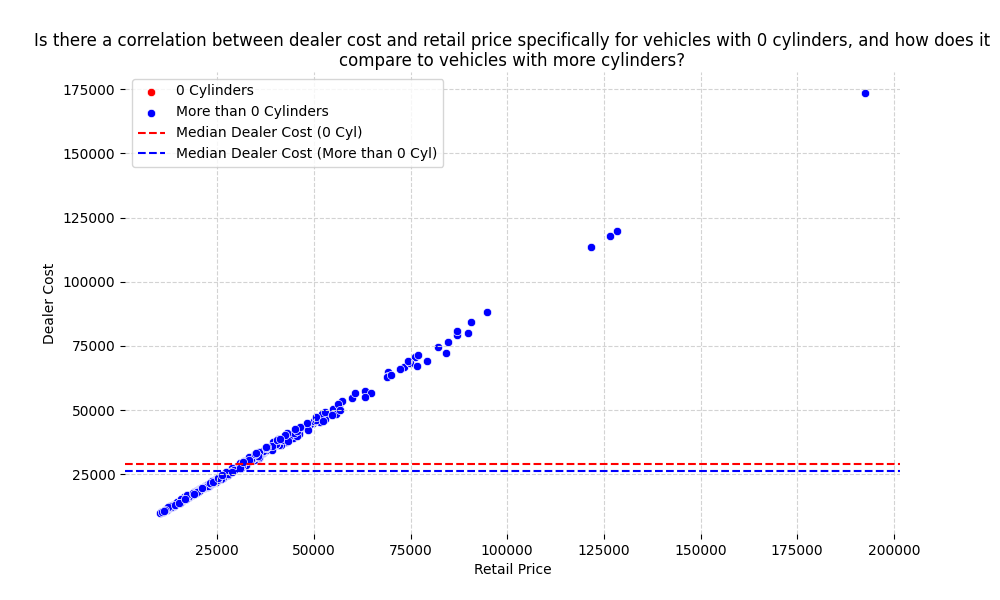

In [59]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.9, use_cache=True)
charts = lida.visualize(summary=summary, goal=two_insight_goals[1], textgen_config=textgen_config, library=library)  
charts[0]

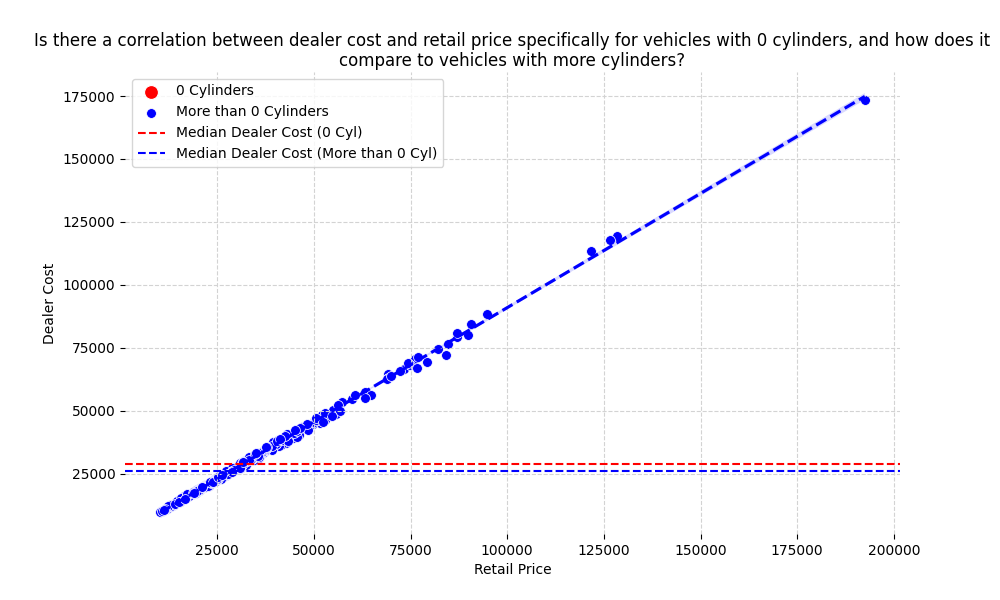

In [62]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the 0 cylinders dot more visible and put then higher than the more than 0 cylinders. draw a line of fitness"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Generating Insight goals

In [124]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
insight_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=goals[i], prompts=prompts, insights=[insights[8]], answers=answers)

for insight_goal in insight_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How does the average retail price of cars with 12 cylinders compare to the industry standards?

**Visualization:** `bar chart showing the average Retail_Price of cars with 12 cylinders compared to industry standards`

**Rationale:** This is crucial because it will help us understand if the extremely high prices of cars with 12 cylinders align with industry norms. By visualizing this comparison, we can determine if these ultra-luxury or high-performance vehicles deviate significantly from the standard pricing in the market, which directly relates to the user's insight about outlier status.



### Goal 1
---
**Question:** What is the relationship between horsepower and retail price for cars with 12 cylinders?

**Visualization:** `scatter plot of Horsepower_HP_ versus Retail_Price for cars with 12 cylinders`

**Rationale:** This will reveal how the horsepower of cars with 12 cylinders influences their retail prices. By examining this relationship, we can explore whether the high costs of these vehicles are justified by their high horsepower, providing deeper insights into the factors contributing to the outlier status mentioned by the user.



### Goal 2
---
**Question:** How do the city miles per gallon vary for cars with different cylinder counts?

**Visualization:** `box plot of City_Miles_Per_Gallon by Cyl`

**Rationale:** This analysis is essential to understand the fuel efficiency of cars across different cylinder counts. By visualizing the variation in city miles per gallon, we can explore how the number of cylinders impacts the fuel consumption of vehicles, which is a crucial aspect when considering the high costs and prices associated with cars with 12 cylinders.



### Goal 3
---
**Question:** Is there a correlation between engine size and dealer cost for cars with 12 cylinders?

**Visualization:** `scatter plot of Engine_Size__l_ versus Dealer_Cost for cars with 12 cylinders`

**Rationale:** By investigating the relationship between engine size and dealer cost specifically for cars with 12 cylinders, we can determine if larger engine sizes contribute to the higher costs observed in these vehicles. This visualization will allow us to explore potential patterns or correlations that support the user's insight regarding the outlier status of cars with 12 cylinders.



### Goal 4
---
**Question:** How does the weight of cars with 12 cylinders compare to the average weight of all vehicles in the dataset?

**Visualization:** `bar chart comparing the average Weight of cars with 12 cylinders to the overall average Weight`

**Rationale:** By comparing the weight of cars with 12 cylinders to the average weight of all vehicles, we can gain insights into the relative heaviness of these high-performance or ultra-luxury vehicles. This comparison will help us understand if the outlier status based on pricing also extends to the physical characteristics, providing a holistic view of the unique features of cars with 12 cylinders.


In [46]:
#SAVE

with open('./two-insights-goals.pkl', 'wb') as f:
    pickle.dump(insight_goals, f)

In [68]:
print(insight_goals)

[Goal(question='How do the average retail prices of cars with 0, 3, 4, 6, and 12 cylinders compare?', visualization='bar chart of average Retail_Price by Cyl', rationale="By comparing the average retail prices of cars with different cylinder counts, we can gain insights into the impact of cylinder numbers on pricing, which aligns with the user's insight that certain cylinder counts may justify higher prices.", index=0), Goal(question='What is the average dealer cost for cars with different cylinder counts?', visualization='bar chart of average Dealer_Cost by Cyl', rationale="Exploring the average dealer costs across various cylinder counts will provide valuable information on the cost implications of producing cars with different cylinder configurations, thus connecting to the user's insight about unique features associated with 0 and 6 cylinder cars.", index=1), Goal(question='How does the average retail price vary for different types of vehicles (Sedan, SUV, Sports Car, Wagon, Miniva

In [123]:
#SAVE

with open('./barchart/cars18-v2-5-6/prompt3/goals-i0-i1-v3-9.pkl', 'wb') as f:
    pickle.dump(insight_goals, f)

In [128]:
goals[0]


### Goal 0
---
**Question:** What is the distribution of car types in the dataset?

**Visualization:** `bar chart of Type`

**Rationale:** This visualization uses the 'Type' column to show the frequency of each car type (e.g., Sedan, SUV, Sports Car, Wagon, Minivan). A bar chart is appropriate here as it allows for easy comparison of the number of cars in each category, helping to identify which types are most prevalent and potentially influencing market trends.
